In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import geopandas as gpd
import rtree
from shapely.geometry import Point, Polygon, MultiPolygon
from shapely import wkt
import descartes

import fiona
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', None)

sns.set_palette(sns.diverging_palette(10, 220, sep=80, n=3, center="dark"))

sns.set_context('talk')

import warnings 
warnings.filterwarnings('ignore')

In [2]:
aff = pd.read_csv('../data/open_data/csv/Affordable_Housing.csv')
aff['geometry'] = aff.apply(lambda row: Point(row.X, row.Y), axis=1)
aff = gpd.GeoDataFrame(aff)

In [3]:
poi = pd.read_csv('../data/open_data/csv/Points_of_Interest.csv')
poi['geometry'] = poi.apply(lambda row: Point(row.X, row.Y), axis=1)
poi = gpd.GeoDataFrame(poi)

In [50]:
poi

,X,Y,OBJECTID,ADDRALIAS_ID,ADDRESS_ID,STATUS,ALIASTYPE,ALIASNAME,ADDRNUM,ADDRNUMSUFFIX,STNAME,FULLADDRESS,METADATA_ID,SITE_ADDRESS_PK,ROADWAYSEGID,SSL,TYPE_,ENTRANCETYPE,STREET_TYPE,QUADRANT,CITY,STATE,SQUARE,SUFFIX,LOT,NATIONALGRID,ZIPCODE4,XCOORD,YCOORD,STATUS_ID,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CFSA_NAME,HOTSPOT,CLUSTER_,POLDIST,ROC,PSA,SMD,CENSUS_TRACT,VOTE_PRCNCT,WARD,ZIPCODE,ANC,NEWCOMMSELECT06,NEWCOMMCANDIDATE,FOCUS_IMPROVEMENT_AREA,SE_ANNO_CAD_DATA,WARD_2002,WARD_2012,ANC_2002,ANC_2012,SMD_2002,SMD_2012,geometry
0,-76.992044,38.881092,114241,4752,294505,ACTIVE,BUILDING NAME,TYLER ELEMENTARY SCHOOL,1001.0,NaN,G,1001 G STREET SE,299153,294505,1634.0,0974 0841,ADDRESS,OFFICIAL,STREET,SE,WASHINGTON,DC,0974,NaN,0841,18S UJ 27210 05466,NaN,400690.52,134805.51,1,Old City 1,039 C Old City 1,South Washington/West of the River Collaborative,NaN,Cluster 26,Police District - First District,Police Sector 1D3,Police Service Area 106,SMD 6B04,7000.0,Precinct 90,Ward 6,20003.0,ANC 6B,NaN,NaN,NaN,NaN,Ward 6,Ward 6,ANC 6B,ANC 6B,SMD 6B04,SMD 6B04,POINT (-76.99204393674256 38.88109180742595)
1,-77.034829,38.901584,114242,2798,279976,ACTIVE,BUILDING NAME,UNITED MINE WORKERS OF AMERICA,900.0,NaN,15TH,900 15TH STREET NW,295651,279976,7698.0,0199 0834,ADDRESS,OFFICIAL,STREET,NW,WASHINGTON,DC,0199,NaN,0834,18S UJ 23549 07823,NaN,396979.02,137080.80,1,Central-tri 3,NaN,NaN,NaN,Cluster 6,Police District - Second District,Police Sector 2D3,Police Service Area 207,SMD 2B05,10100.0,Precinct 17,Ward 2,20005.0,ANC 2B,NaN,NaN,NaN,NaN,Ward 2,Ward 2,ANC 2B,ANC 2B,SMD 2B05,SMD 2B05,POINT (-77.03482949888219 38.90158354933374)
2,-76.967292,38.858655,114243,7682,278278,ACTIVE,BUILDING NAME,FREDERICK DOUGLASS POST OFFICE,2833.0,NaN,ALABAMA,2833 ALABAMA AVENUE SE,310860,278278,3141.0,5642 0001,ADDRESS,OFFICIAL,AVENUE,SE,WASHINGTON,DC,5642,NaN,0001,18S UJ 29303 02930,NaN,402839.03,132315.39,1,Hillcrest,028 A Hillcrest,East of the River Collaborative,NaN,Cluster 35,Police District - Sixth District,Police Sector 6D2,Police Service Area 606,SMD 7B05,7603.0,Precinct 113,Ward 7,20020.0,ANC 7B,NaN,NaN,NaN,NaN,Ward 7,Ward 7,ANC 7B,ANC 7B,SMD 7B05,SMD 7B05,POINT (-76.96729234075291 38.85865548160394)
3,-77.025967,38.916536,114244,9823,308944,ACTIVE,BUILDING NAME,AFRICAN AMERICAN CIVIL WAR MEMORIAL,NaN,NaN,U,NaN,545073,308944,3746.0,NaN,PLACE,OFFICIAL,STREET,NW,WASHINGTON,DC,NaN,NaN,NaN,18S UJ 24354 09465,NaN,397748.24,138740.44,1,Old City 2,040 E Old City 2,Columbia Heights/Shaw Collaborative,NaN,Cluster 3,Police District - Third District,Police Sector 3D2,Police Service Area 305,SMD 1B02,4400.0,Precinct 22,Ward 1,20001.0,ANC 1B,NaN,NaN,NaN,NaN,Ward 1,Ward 1,ANC 1B,ANC 1B,SMD 1B02,SMD 1B02,POINT (-77.02596703268672 38.91653646669305)
4,-77.042588,38.895703,114246,12776,311026,ACTIVE,BUILDING NAME,RAWLINS PARK,NaN,NaN,E,NaN,588957,311026,8989.0,0143 0801,PLACE,OFFICIAL,STREET,NW,WASHINGTON,DC,0143,NaN,0801,18S UJ 22862 07185,NaN,396305.76,136428.28,1,Foggy Bottom,NaN,NaN,NaN,Cluster 5,Police District - Second District,Police Sector 2D3,Police Service Area 207,SMD 2A01,10800.0,Precinct 2,Ward 2,20006.0,ANC 2A,NaN,NaN,NaN,NaN,Ward 2,Ward 2,ANC 2A,ANC 2A,SMD 2A05,SMD 2A01,POINT (-77.04258763922535 38.89570284133932)
5,-77.032968,38.895985,114247,12782,308612,ACTIVE,BUILDING NAME,PERSHING SQUARE,NaN,NaN,PENNSYLVANIA,NaN,588971,308612,4465.0,0226 0802,PLACE,OFFICIAL,AVENUE,NW,WASHINGTON,DC,0226,NaN,0802,18S UJ 23697 07198,NaN,397140.23,136459.31,1,Mall/East Potomac Park,NaN,NaN,NaN,NaN,Police District - Second District,Police Sector 2D3,Police Service Area 207,SMD 2C01,6202.0,Precinct 129,Ward 2,20004.0,ANC 2C,NaN,NaN,NaN,NaN,Ward 2,Ward 2,ANC 2F,ANC 2C,SMD 2F03,SMD 2C01,POINT (-77.03296841546556 38.89598548196932)
6,-77.019381,38.845094,114249,6446,297321,ACTIVE,BUILDING NAME,JOINT BASE ANACOSTIA - BOLLING FAMILY HOUSING,5537.0,F,KISLING,5537 F KISLING STREET SW,303639,297321,1120.0,RES 343A0000,ADDRESS,OFFICIAL,STREET,SW,WASHINGTON,DC,0000,NaN,0000,18S UJ 24750 01523,

In [4]:
Census = gpd.read_file('../data/open_data/gis/Census_Blocks__2010/Census_Blocks__2010.shp')

In [5]:
Census.columns

Index(['OBJECTID', 'BLKGRP', 'BLOCK', 'GEOID', 'GEOID10', 'ALAND10',
       'AWATER10', 'P0010001', 'P0010002', 'P0010003', 'P0010004', 'P0010005',
       'P0010006', 'P0010007', 'P0010008', 'OP000001', 'OP000002', 'OP000003',
       'OP000004', 'P0020002', 'P0020005', 'P0020006', 'P0020007', 'P0020008',
       'P0020009', 'P0020010', 'OP00005', 'OP00006', 'OP00007', 'OP00008',
       'P0030001', 'P0030003', 'P0030004', 'P0030005', 'P0030006', 'P0030007',
       'P0030008', 'OP00009', 'OP00010', 'OP00011', 'OP00012', 'P0040002',
       'P0040005', 'P0040006', 'P0040007', 'P0040008', 'P0040009', 'P0040010',
       'OP000013', 'OP000014', 'OP000015', 'OP000016', 'H0010001', 'H0010002',
       'H0010003', 'ACRES', 'Shape_Leng', 'Shape_Area', 'SQMILES', 'geometry'],
      dtype='object')

In [6]:
Census.columns = ['OBJECTID', 'BLKGRP', 'BLOCK', 'GEOID', 'GEOID10', 'ALAND10',
       'AWATER10', 'TOTPOP', 'P0010002', 'P0010003', 'P0010004', 'P0010005',
       'P0010006', 'P0010007', 'P0010008', 'OP000001', 'OP000002', 'OP000003',
       'OP000004', 'P0020002', 'P0020005', 'P0020006', 'P0020007', 'P0020008',
       'P0020009', 'P0020010', 'OP00005', 'OP00006', 'OP00007', 'OP00008',
       'P0030001', 'P0030003', 'P0030004', 'P0030005', 'P0030006', 'P0030007',
       'P0030008', 'OP00009', 'OP00010', 'OP00011', 'OP00012', 'P0040002',
       'P0040005', 'P0040006', 'P0040007', 'P0040008', 'P0040009', 'P0040010',
       'OP000013', 'OP000014', 'OP000015', 'OP000016','Total_Housing_Units', 
       'Occupied_Housing_Units', 'Vacant_Housing_Units', 'ACRES', 'Shape_Length', 
       'Shape_Area', 'SQMILES', 'geometry']

In [7]:
MiniCensus = Census[['OBJECTID', 'BLKGRP', 'BLOCK', 'GEOID', 'GEOID10', 'ALAND10',
       'AWATER10', 'TOTPOP', 'Total_Housing_Units', 'Occupied_Housing_Units', 'Vacant_Housing_Units', 
       'ACRES', 'Shape_Length', 'Shape_Area', 'SQMILES', 'geometry']]

In [8]:
MiniCensus.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6507 entries, 0 to 6506
Data columns (total 16 columns):
OBJECTID                  6507 non-null int64
BLKGRP                    6507 non-null object
BLOCK                     6507 non-null object
GEOID                     6507 non-null object
GEOID10                   6507 non-null object
ALAND10                   6507 non-null int64
AWATER10                  6507 non-null int64
TOTPOP                    6507 non-null int64
Total_Housing_Units       6507 non-null int64
Occupied_Housing_Units    6507 non-null int64
Vacant_Housing_Units      6507 non-null int64
ACRES                     6507 non-null float64
Shape_Length              6507 non-null float64
Shape_Area                6507 non-null float64
SQMILES                   6507 non-null float64
geometry                  6507 non-null geometry
dtypes: float64(4), geometry(1), int64(7), object(4)
memory usage: 813.5+ KB


In [ ]:
MiniCensus.shape[0]

In [55]:
print(f"""Out of {MiniCensus.shape[0]} blocks, \
{MiniCensus.loc[MiniCensus['Occupied_Housing_Units'] > MiniCensus['Total_Housing_Units']].shape[0]} blocks \
have Occupied Housing Units > Total Housing Units and \
{MiniCensus.loc[MiniCensus['Total_Housing_Units'] != (MiniCensus['Occupied_Housing_Units']+MiniCensus['Vacant_Housing_Units'])].shape[0]} \
blocks have Total Housing Units != to Occupied Housing Units + Vacant Units""")


Out of 6507 blocks, 213 blocks have Occupied Housing Units > Total Housing Units and 547 blocks have Total Housing Units != to Occupied Housing Units + Vacant Units


In [34]:
MiniCensus.loc[MiniCensus['Occupied_Housing_Units'] > MiniCensus['Total_Housing_Units']].shape

(213, 18)

In [35]:
MiniCensus.loc[MiniCensus['Total_Housing_Units'] != (MiniCensus['Occupied_Housing_Units']+MiniCensus['Vacant_Housing_Units'])].shape
                                                     

(547, 18)

In [57]:
MiniCensus['PERC_OF_TOT_OCC'] = MiniCensus['Occupied_Housing_Units']/MiniCensus['Total_Housing_Units']
MiniCensus['PERC_OF_TOT_OCC'] = MiniCensus['PERC_OF_TOT_OCC'].fillna(0)

In [58]:
MiniCensus['OCC_PER_CAP'] = MiniCensus['Occupied_Housing_Units']/MiniCensus['TOTPOP']
MiniCensus['OCC_PER_CAP'] = MiniCensus['OCC_PER_CAP'].fillna(0)

In [59]:
MiniCensus.PERC_OF_TOT_OCC = MiniCensus.PERC_OF_TOT_OCC.replace(np.inf,0)
MiniCensus['OCC_PER_CAP'] = MiniCensus['OCC_PER_CAP'].replace(np.inf,0)

In [14]:
MiniCensus.OCC_PER_CAP.describe()

count    6507.000000
mean        0.410224
std         4.601279
min         0.000000
25%         0.000000
50%         0.351351
75%         0.445995
max       321.000000
Name: OCC_PER_CAP, dtype: float64

In [33]:
MiniCensus.to_file('../data/viz/census0.shp')

In [60]:
master = gpd.sjoin(poi, MiniCensus)

In [17]:
master.columns

Index(['X', 'Y', 'OBJECTID_left', 'ADDRALIAS_ID', 'ADDRESS_ID', 'STATUS',
       'ALIASTYPE', 'ALIASNAME', 'ADDRNUM', 'ADDRNUMSUFFIX', 'STNAME',
       'FULLADDRESS', 'METADATA_ID', 'SITE_ADDRESS_PK', 'ROADWAYSEGID', 'SSL',
       'TYPE_', 'ENTRANCETYPE', 'STREET_TYPE', 'QUADRANT', 'CITY', 'STATE',
       'SQUARE', 'SUFFIX', 'LOT', 'NATIONALGRID', 'ZIPCODE4', 'XCOORD',
       'YCOORD', 'STATUS_ID', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CFSA_NAME', 'HOTSPOT', 'CLUSTER_', 'POLDIST', 'ROC', 'PSA', 'SMD',
       'CENSUS_TRACT', 'VOTE_PRCNCT', 'WARD', 'ZIPCODE', 'ANC',
       'NEWCOMMSELECT06', 'NEWCOMMCANDIDATE', 'FOCUS_IMPROVEMENT_AREA',
       'SE_ANNO_CAD_DATA', 'WARD_2002', 'WARD_2012', 'ANC_2002', 'ANC_2012',
       'SMD_2002', 'SMD_2012', 'geometry', 'index_right', 'OBJECTID_right',
       'BLKGRP', 'BLOCK', 'GEOID', 'GEOID10', 'ALAND10', 'AWATER10', 'TOTPOP',
       'Total_Housing_Units', 'Occupied_Housing_Units', 'Vacant_Housing_Units',
       'ACRES', 'Shape_Length', 'S

In [18]:
cols = list(MiniCensus.columns)
cols.append('ADDRESS_ID')
cols[0] = 'OBJECTID_right'
cols

['OBJECTID_right',
 'BLKGRP',
 'BLOCK',
 'GEOID',
 'GEOID10',
 'ALAND10',
 'AWATER10',
 'TOTPOP',
 'Total_Housing_Units',
 'Occupied_Housing_Units',
 'Vacant_Housing_Units',
 'ACRES',
 'Shape_Length',
 'Shape_Area',
 'SQMILES',
 'geometry',
 'PERC_OF_TOT_OCC',
 'OCC_PER_CAP',
 'ADDRESS_ID']

In [19]:
cols2 = cols.copy()
cols2.pop()
cols2

['OBJECTID_right',
 'BLKGRP',
 'BLOCK',
 'GEOID',
 'GEOID10',
 'ALAND10',
 'AWATER10',
 'TOTPOP',
 'Total_Housing_Units',
 'Occupied_Housing_Units',
 'Vacant_Housing_Units',
 'ACRES',
 'Shape_Length',
 'Shape_Area',
 'SQMILES',
 'geometry',
 'PERC_OF_TOT_OCC',
 'OCC_PER_CAP']

In [20]:
count = master[['GEOID10','ADDRESS_ID']].groupby(by='GEOID10').count()

In [21]:
count_poi = MiniCensus.merge(count, on='GEOID10')

In [22]:
count_poi.columns = ['OBJECTID', 'BLKGRP', 'BLOCK', 'GEOID', 'GEOID10', 'ALAND10',
       'AWATER10', 'TOTPOP', 'Total_Housing_Units', 'Occupied_Housing_Units',
       'Vacant_Housing_Units', 'ACRES', 'Shape_Length', 'Shape_Area',
       'SQMILES', 'geometry', 'PERC_OF_TOT_OCC', 'OCC_PER_CAP', 'ft_count']

In [23]:
count_poi['Total_Housing_Units'] = count_poi['Occupied_Housing_Units']+count_poi['Vacant_Housing_Units']

In [24]:
count_poi['PERC_OF_TOT_OCC'] = count_poi['Occupied_Housing_Units']/count_poi['Total_Housing_Units']
count_poi['PERC_OF_TOT_OCC'] = count_poi['PERC_OF_TOT_OCC'].fillna(0)

In [25]:
count_poi['OCC_PER_CAP'] = count_poi['Occupied_Housing_Units']/count_poi['TOTPOP']
count_poi['OCC_PER_CAP'] = count_poi['OCC_PER_CAP'].fillna(0)

In [28]:
count_poi_occupied = count_poi.loc[(count_poi.PERC_OF_TOT_OCC > .05)]

In [30]:
count_poi_occupied = count_poi_occupied.loc[count_poi.ft_count < 100]

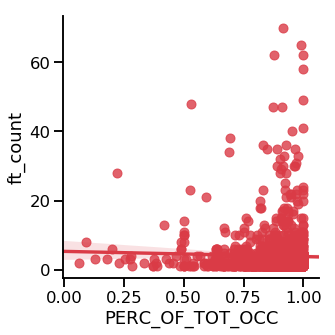

In [61]:
sns.lmplot(x='PERC_OF_TOT_OCC',y='ft_count', data=count_poi_occupied);

In [32]:
count_poi_occupied.to_file('../data/viz/census1.shp')